# **Projet Apprentissage Machine:** Analyse de performance académique (Student Performance Dataset – **Kaggle**) 

### **<u>Objectif:</u>**
1. Régression pour prédire les notes finales.
2. Classification (succès vs échec).
3. Clustering des profils d’étudiants. 
4. Ensembles pour combiner les prédictions.

### **Description du jeu de données**:
- Ce jeu de données contient les notes des étudiants au Lycée (États-Unis) pour certaines matières, et l'influence du bagage parentale sur les performances académiques.

  - _gender_           -            (female, male)
  - _race/ethnicity_       -        (group C, group D, group B, group E, group A)
  - _parental level of education_ - (some college, associate's degree, high school, some high school,bachelor's degree)
  - _lunch_           -             (standard, free/reduced)
  - _test preparation course_   -   (none, completed)
  - _math score_         -          (Between 0 and 100) 
  - _reading score_       -         (Between 17 and 100) 
  - _writing score_        -        (Between 10 and 100) 

## **1. Chargement et préparation des données**

### **<u>Tâches à faire</u>**:
1. Nettoyage, encodage des variables catégorielles, normalisation. 
2. Gestion des valeurs manquantes. 
3. Analyse descriptive des données.

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### (a) Chargement des données

In [82]:
df = pd.read_csv("../data/StudentsPerformance.csv") # Update l'import du dataset
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### (b) Nettoyage des données

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [84]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [85]:
# Vérifie les doublons
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [87]:
#valeurs uniques
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [88]:
# sélection des colonnes catégoriel
categoriel_col = df.select_dtypes(exclude=["number"]).columns
categoriel_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [89]:
# sélection des colonnes numerique
numerical_col = df.select_dtypes(exclude=["object"]).columns
numerical_col

Index(['math score', 'reading score', 'writing score'], dtype='object')

### (c) Encodage des colonnes catégorielles

In [93]:
# encodage des colonnes catégorielles
categoriel_df = df[categoriel_col]
print(f"Nombre de colonnes catégorielles à traiter: {len(categoriel_col)}")
categoriel_df.head(10)

Nombre de colonnes catégorielles à traiter: 5


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


### (d) One Hot Encoding (OHE)

In [94]:
# one hot encoding pour la colonne gender et test preparation course

# 1 - OHE des caractéristiques `gender`, `lunch` et `test preparation course`
categoriel_df = pd.get_dummies(categoriel_df, columns=['gender', 'lunch', 'test preparation course'])
categoriel_df.head()

,race/ethnicity,parental level of education,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,group B,bachelor's degree,True,False,False,True,False,True
1,group C,some college,True,False,False,True,True,False
2,group B,master's degree,True,False,False,True,False,True
3,group A,associate's degree,False,True,True,False,False,True
4,group C,some college,False,True,False,True,False,True


### (e) Ordinal Encoder (OE)

In [95]:
#encodage ordinal

# 2 - OE de la caractéristique `parental level of education`
# L'ordre défini est important
# Conserve l'importance de chaque niveau d'éducation des parents.

encodage = OrdinalEncoder(categories=[["high school", "some high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]])
encodage.fit(categoriel_df[['parental level of education']])
categoriel_df['parental level of education'] = encodage.transform(categoriel_df[['parental level of education']])

categoriel_df

# 0 = high school
# 1 = some high school
# 2 = some college
# 3 = associate's degree
# 4 = bachelor's degree
# 5 = master's degree

,race/ethnicity,parental level of education,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,group B,4.0,True,False,False,True,False,True
1,group C,2.0,True,False,False,True,True,False
2,group B,5.0,True,False,False,True,False,True
3,group A,3.0,False,True,True,False,False,True
4,group C,2.0,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...
995,group E,5.0,True,False,False,True,True,False
996,group C,0.0,False,True,True,False,False,True
997,group C,0.0,True,False,True,False,True,False
998,group D,2.0,True,False,False,True,True,False


### (f) Encodage de fréquence (FE)

In [116]:
# Encodage de fréquence

# 3 - `FE` de la caractéristique `race/ethnicity`
encodage_freq = categoriel_df['race/ethnicity'].value_counts(normalize=True)
categoriel_df['race/ethnicity'] = categoriel_df['race/ethnicity'].map(encodage_freq)
categoriel_df.head()

,race/ethnicity,parental level of education,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.190,4.0,True,False,False,True,False,True
1,0.319,2.0,True,False,False,True,True,False
2,0.190,5.0,True,False,False,True,False,True
3,0.089,3.0,False,True,True,False,False,True
4,0.319,2.0,False,True,False,True,False,True


### ~~(g) Encodage de cible (TE)~~

In [97]:
# encodage de cible
# aucun besoin d'encoder par cible car il n'existe aucune cible apparente
# avec laquelle associer notre variable à encoder.

# 4 - La caractéristique `lunch` est encodée plus haut, par OHE et non OE car il n'y a pas 
# réellement de relation d'ordre entre les catégories `['standard', 'free/reduced']`

# df_encodage_cible = pd.DataFrame({'lunch': ['standard', 'free/reduced'], 'target': [0,1]})
# mean_cb = df_encodage_cible.groupby('lunch')['target'].mean()
# df['lunch'] = df['lunch'].map(mean_cb)
# df

### (h) Normalisation/Standardisation des données

In [121]:
# L'encodage ordinal a créer des colonnes numériques
# Fusionner les colonnes catégorielles et numériques
numerical_df = df[numerical_col]
clean_df = pd.concat([categoriel_df, numerical_df], axis=1) # Fusionner `categoriel_df` et `numerical_df`
print(f'Taille des données nettoyées: {clean_df.shape}\n')

# Normalisation/Standardisation des données
# Avec `MinMaxScaler`
min_max_scaler = MinMaxScaler()
min_max_scaler.set_output(transform="pandas")
min_max_scaler.fit(clean_df)

donnees_normaliser = min_max_scaler.transform(clean_df)
print(f'Données scalées avec `MinMaxScaler`, aperću: \n{donnees_normaliser.iloc[0:3, 0:4]}')

Taille des données nettoyées: (1000, 11)

Données scalées avec `MinMaxScaler`, aperću: 
   race/ethnicity  parental level of education  gender_female  gender_male
0         0.43913                          0.8            1.0          0.0
1         1.00000                          0.4            1.0          0.0
2         0.43913                          1.0            1.0          0.0


In [126]:
# Fusionner les colonnes catégorielles et numériques
# On évite d'utiliser le `clean_df` déjà fitté sur le `MinMaxScaler`
clean_df = pd.concat([categoriel_df, numerical_df], axis=1) # Fusionner `categoriel_df` et `numerical_df`
print(f'Taille des données nettoyées: {clean_df.shape}\n')

# Avec `StandardScaler`
standard_scaler = StandardScaler()
standard_scaler.set_output(transform="pandas")


donnees_standardisees = standard_scaler.fit_transform(clean_df)
print(f'Données scalées avec `StandardScaler`, aperću: \n\n{donnees_standardisees.iloc[:3, :4]}')

Taille des données nettoyées: (1000, 11)

Données scalées avec `StandardScaler`, aperću: 

   race/ethnicity  parental level of education  gender_female  gender_male
0       -0.569024                     1.310052       0.964625    -0.964625
1        1.098265                    -0.043308       0.964625    -0.964625
2       -0.569024                     1.986732       0.964625    -0.964625


## **2. Analyse exploratoire et visualisation**

### **<u>Tâches à faire</u>**:
1. Visualisations des distributions et corrélations. 
2. Graphiques par classes, regroupements, ou tendances temporelles (si 
applicable).

### Effectuons l'analyse exploratoire sur les données prétraitées (`clean_df`).
Le prétraitement ne modifie en rien la pertinence des données. Elle les mets sous une forme plus pratique pour les modèles.

In [155]:
# Aperću de `clean_df`
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   race/ethnicity                     1000 non-null   float64
 1   parental level of education        1000 non-null   float64
 2   gender_female                      1000 non-null   bool   
 3   gender_male                        1000 non-null   bool   
 4   lunch_free/reduced                 1000 non-null   bool   
 5   lunch_standard                     1000 non-null   bool   
 6   test preparation course_completed  1000 non-null   bool   
 7   test preparation course_none       1000 non-null   bool   
 8   math score                         1000 non-null   int64  
 9   reading score                      1000 non-null   int64  
 10  writing score                      1000 non-null   int64  
dtypes: bool(6), float64(2), int64(3)
memory usage: 45.1 KB


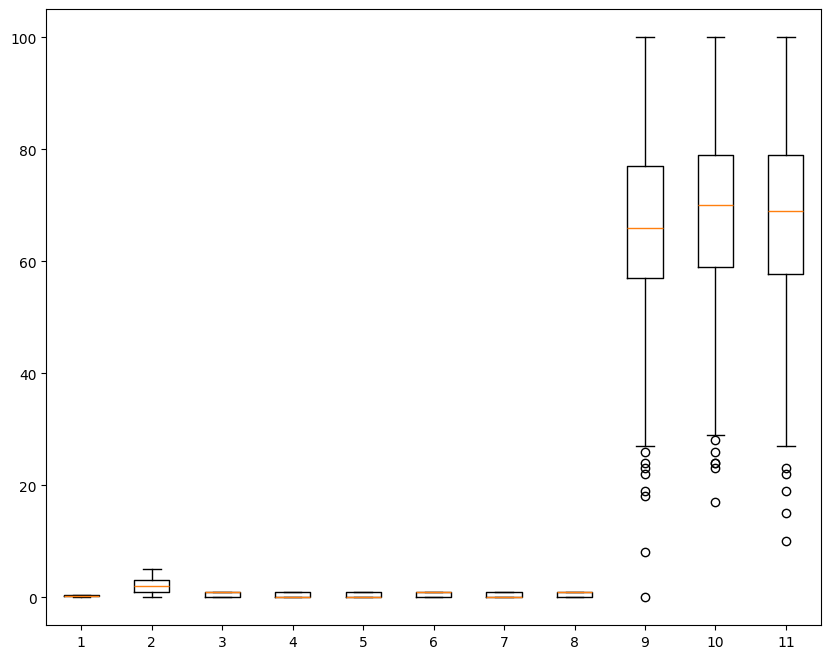

In [159]:
# colonnes_a_tracer = ['math score', 'reading score', 'writing score']
# plt.boxplot(clean_df[colonnes_a_tracer])
### Il y a dans chacun à peu près le même nombre de valeurs abérantes

plt.figure(figsize=(10, 8))
plt.boxplot(clean_df)
plt.show()

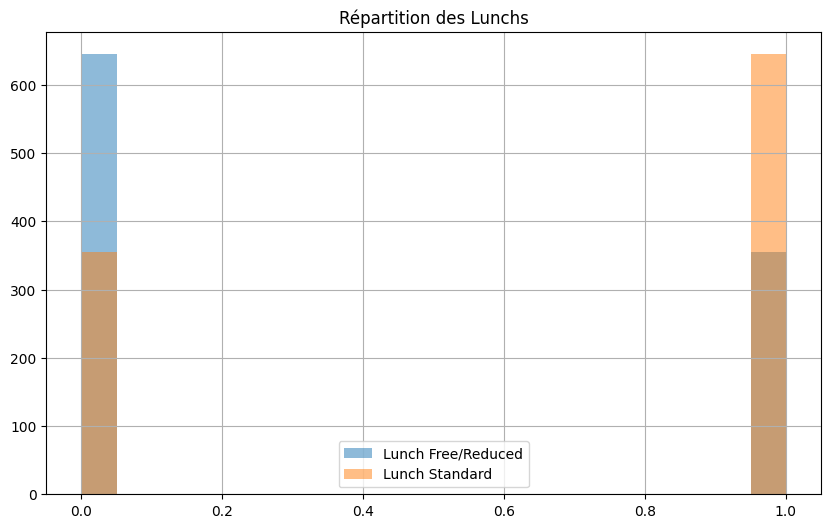

In [174]:
#histogramme pour représenter la répartion de chaque type de lunch
plt.figure(figsize=(10, 6))
plt.hist(clean_df['lunch_free/reduced'].astype(int), bins=20, alpha=0.5, label='Lunch Free/Reduced')
plt.hist(clean_df['lunch_standard'].astype(int), bins=20, alpha=0.5, label='Lunch Standard')

plt.title('Répartition des Lunchs')

plt.legend()
plt.grid()
plt.show()

### Corrélations

<Axes: >

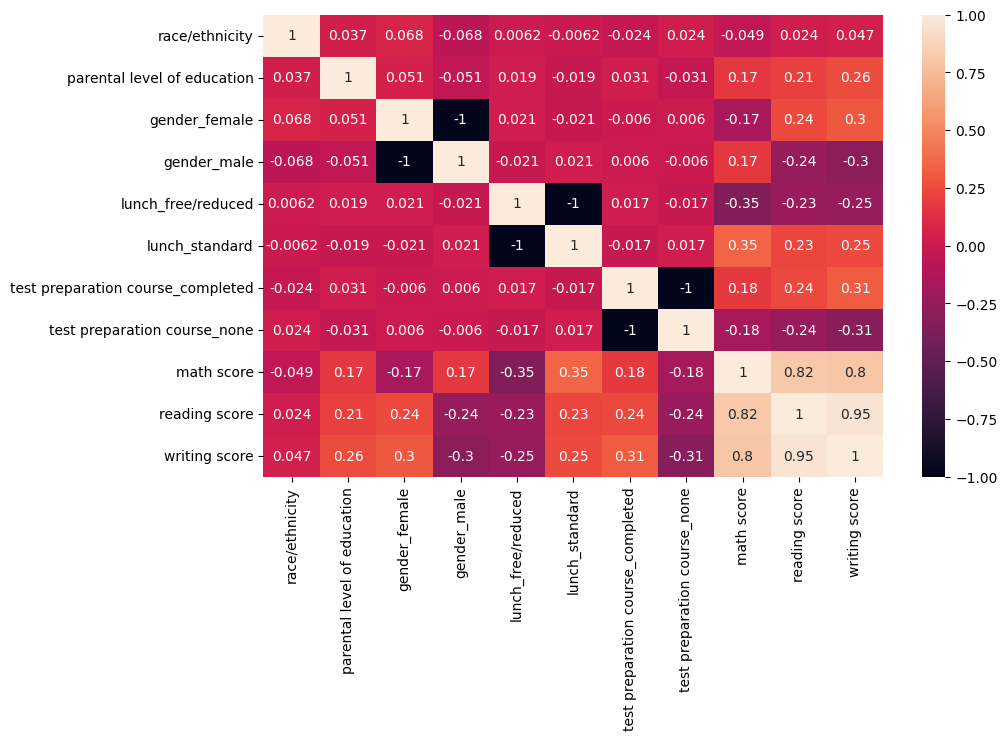

In [175]:
#matrice de corrélation de spearman
corr_matrix_pearson = clean_df.corr()
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix_pearson, annot=True)

In [176]:
clean_df['test preparation course_completed'].value_counts()

test preparation course_completed
False    642
True     358
Name: count, dtype: int64

In [177]:
clean_df['race/ethnicity'].value_counts()

race/ethnicity
0.319    319
0.262    262
0.190    190
0.140    140
0.089     89
Name: count, dtype: int64

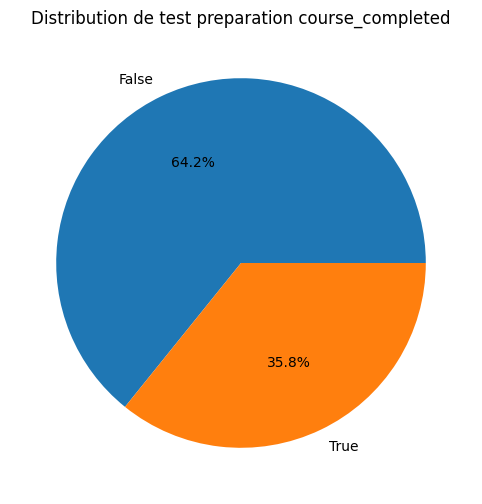

In [178]:
# diagramme circulaire de la colonne test preparation course completed

compte1 = clean_df['test preparation course_completed'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(compte1.values, labels=compte1.index, autopct='%1.1f%%')
plt.title('Distribution de test preparation course_completed')

plt.show()

In [179]:
# Le nombre d'étudiant est plus large dans le groupe '0.319'
df_mode_race_eth = clean_df['race/ethnicity'].mode()

df_mode_race_eth

0    0.319
Name: race/ethnicity, dtype: float64

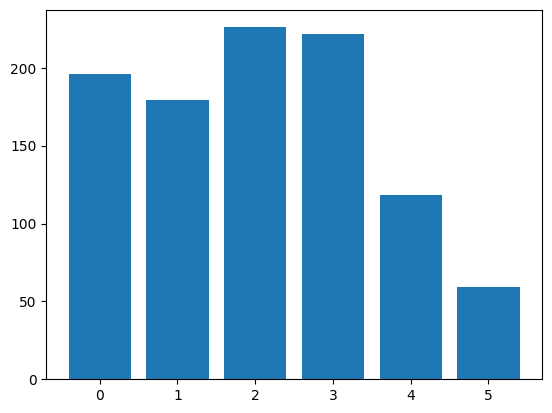

In [182]:
#histogramme pour la colonne 'parental level of education'
compte = clean_df['parental level of education'].value_counts()
plt.bar(compte.index, compte.values)
plt.show()

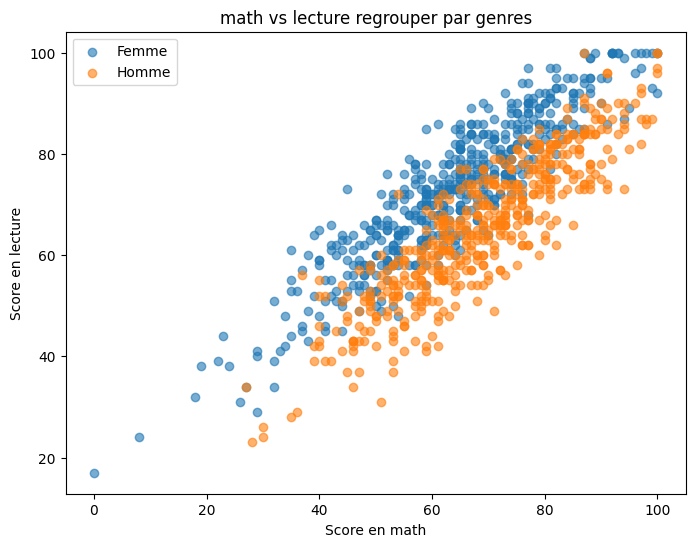

In [183]:
#Nuage de points : coloré par genre
plt.figure(figsize=(8,6))
plt.scatter(clean_df[clean_df['gender_female'] == 1]['math score'], clean_df[clean_df['gender_female'] == 1]['reading score'], label='Femme', alpha=0.6)
plt.scatter(clean_df[clean_df['gender_male'] == 1]['math score'], clean_df[clean_df['gender_male'] == 1]['reading score'], label='Homme', alpha=0.6)
plt.title("math vs lecture regrouper par genres")
plt.xlabel("Score en math")
plt.ylabel("Score en lecture")
plt.legend()
plt.show()

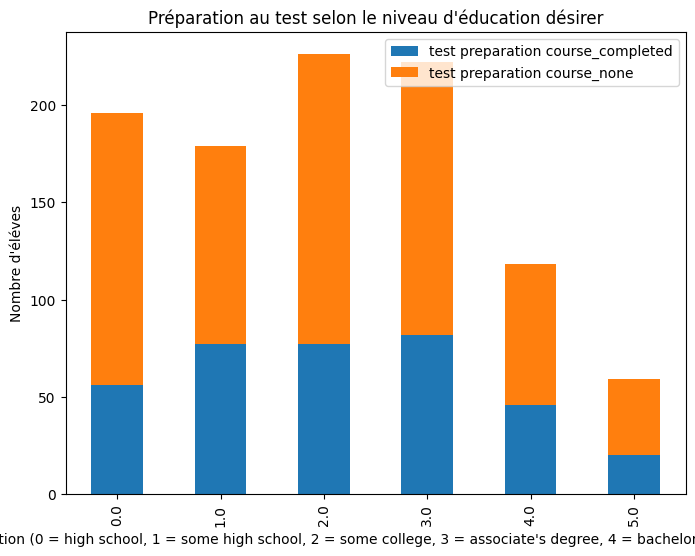

In [186]:
# Diagramme à bande
#Création d'un tableau croisé
prep_level_education = clean_df.groupby('parental level of education')[['test preparation course_completed', 'test preparation course_none']].sum()


prep_level_education.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Préparation au test selon le niveau d'éducation désirer")
plt.xlabel("Type de niveau d'éducation (0 = high school, 1 = some high school, 2 = some college, 3 = associate's degree, 4 = bachelor's degree, 5 = master's degree)")
plt.ylabel("Nombre d'éléves")
plt.show()

In [187]:
# Séparation des données
y = donnees_normaliser["test preparation course_completed"].astype(int)
X = donnees_normaliser.drop(columns=["test preparation course_completed", "test preparation course_none"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### **3. Modélisation supervisée**

### **<u>Tâches à faire</u>**:
1. Entraîner au moins deux modèles différents (ex. : régression 
linéaire/logistique, SVM, arbres de décision). 
2. Comparer les performances avec validation croisée et métriques adaptées 
(précision, rappel, RMSE, etc.).

In [188]:
#Entrainement de deux modèles (SVM, Arbre) 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

modelSVM = SVC(kernel='rbf', probability=True, random_state=42)
ModelArbre = DecisionTreeClassifier(random_state=42)

modelSVM.fit(X_train, y_train)
ModelArbre.fit(X_train, y_train)

pred_SVM = modelSVM.predict(X_test)
pred_Arbre = ModelArbre.predict(X_test)

print("Score (SVM): ", accuracy_score(y_test, pred_SVM))
print("Score (Arbre): ", accuracy_score(y_test, pred_Arbre))
print("Score de précision (SVM): ", precision_score(y_test, pred_SVM))
print("Score de précision (Arbre): ", precision_score(y_test, pred_Arbre))
print("rappel (SVM): ", recall_score(y_test, pred_SVM))
print("rappel (Arbre): ", recall_score(y_test, pred_Arbre))

Score (SVM):  0.676
Score (Arbre):  0.672
Score de précision (SVM):  0.6818181818181818
Score de précision (Arbre):  0.5368421052631579
rappel (SVM):  0.16853932584269662
rappel (Arbre):  0.5730337078651685


In [189]:
# Validaiton croisée
kf = KFold(n_splits=5, shuffle=True)

scores_SVM = cross_val_score(modelSVM, X, y, cv=kf, scoring='accuracy')
scores_Arbre = cross_val_score(ModelArbre, X, y, cv=kf, scoring='accuracy')

print("validaiton croisé (SVM): ", scores_SVM)
print("validaiton croisé (Arbre): ", scores_Arbre)

validaiton croisé (SVM):  [0.63  0.715 0.665 0.635 0.665]
validaiton croisé (Arbre):  [0.59  0.605 0.62  0.61  0.545]


### **4. Modélisation non supervisée (clustering)**

### **<u>Tâches à faire</u>:**
1. Appliquer au moins une méthode de clustering (k-means, DBSCAN, 
hiérarchique). 
2. Interpréter les résultats et comparer la qualité des clusters.

In [190]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Clustering K-means
k=4

kmeans = KMeans(n_clusters=k, random_state=42)
pred_kmeans = kmeans.fit_predict(X)

# Évaluation avec CH, Silhouette, DB
print("CH: ", calinski_harabasz_score(X, pred_kmeans))
print("Silhouette: ", silhouette_score(X, pred_kmeans))
print("Davies-Bouldin: ", davies_bouldin_score(X, pred_kmeans))

CH:  1191.4591876119187
Silhouette:  0.5703990594988482
Davies-Bouldin:  0.701895157860953


In [191]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

pred_rf = RFC.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, pred_rf))
print("précision de score: ", precision_score(y_test, pred_rf))
print("rappel: ", recall_score(y_test, pred_rf))

accuracy_score:  0.74
précision de score:  0.7068965517241379
rappel:  0.4606741573033708
